In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils import to_categorical

In [5]:
# Loading Fashion MNIST training and test dataset
fashion_mnist_train = pd.read_csv('MNIST_data/fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('MNIST_data/fashion-mnist_test.csv')

# Examining the shape of the data set
print(f'fashion_mnist_train.shape: {fashion_mnist_train.shape}')
print(f'fashion_mnist_test.shape: {fashion_mnist_test.shape}')

fashion_mnist_train.shape: (60000, 785)
fashion_mnist_test.shape: (10000, 785)


In [7]:
# Setting up the convolution neural network with convnet and maxpooling layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Model Summary
print(f'model.summary(): {model.summary()}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [8]:
# Adding the fully connected layers to CNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Printing model summary
print(f'model.summary(): {model.summary()}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [9]:
# Configuring the network
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Preparing the training data set for training
X = np.array(fashion_mnist_train.iloc[:, 1:])
y = to_categorical(np.array(fashion_mnist_train.iloc[:, 0]))

In [10]:
# Create training and validation data split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the test data set for testing
X_test = np.array(fashion_mnist_test.iloc[:, 1:])
y_test = to_categorical(np.array(fashion_mnist_test.iloc[:, 0]))

# Reshaping the dataset in (28, 28, 1) in order to feed into neural network
# Convnet takes the input tensors of shape (image_height, image_width, image_channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

# Changing the dataset to float
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

# Examinging the shape of the dataset
print(f'X_train.shape: {X_train.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (42000, 28, 28, 1)
X_val.shape: (18000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)


In [11]:
# Fit the CNN model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=512)

Epoch 1/15
83/83 [==============================] - 13s 144ms/step - loss: 1.0881 - accuracy: 0.6066 - val_loss: 2.2112 - val_accuracy: 0.3943
Epoch 2/15
83/83 [==============================] - 11s 135ms/step - loss: 0.6612 - accuracy: 0.7564 - val_loss: 0.9862 - val_accuracy: 0.5964
Epoch 3/15
83/83 [==============================] - 11s 130ms/step - loss: 0.5349 - accuracy: 0.7984 - val_loss: 0.7024 - val_accuracy: 0.7421
Epoch 4/15
83/83 [==============================] - 10s 126ms/step - loss: 0.4727 - accuracy: 0.8235 - val_loss: 0.7210 - val_accuracy: 0.7612
Epoch 5/15
83/83 [==============================] - 11s 127ms/step - loss: 0.4275 - accuracy: 0.8420 - val_loss: 0.4717 - val_accuracy: 0.8187
Epoch 6/15
83/83 [==============================] - 11s 129ms/step - loss: 0.3934 - accuracy: 0.8555 - val_loss: 0.8202 - val_accuracy: 0.6732
Epoch 7/15
83/83 [==============================] - 11s 128ms/step - loss: 0.3698 - accuracy: 0.8639 - val_loss: 0.5825 - val_accuracy: 0.7754

313/313 [==============================] - 2s 5ms/step - loss: 0.3243 - accuracy: 0.8838
test_loss: 0.3243311643600464
test_acc: 0.8838000297546387


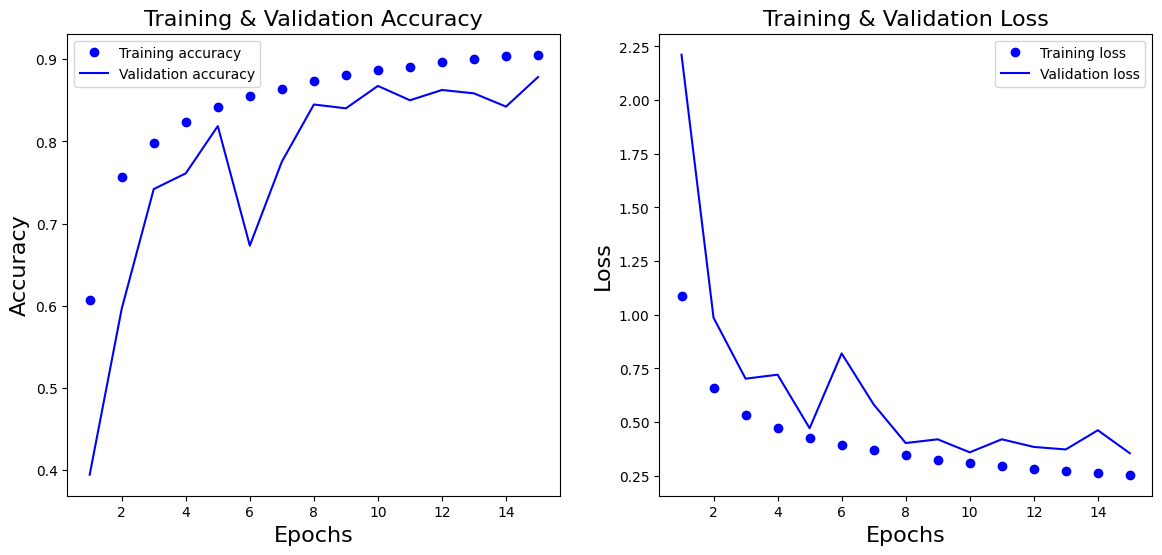

In [12]:

import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# Evaluate the model accuracy and loss on the test dataset
#
test_loss, test_acc = model.evaluate(X_test, y_test)
#
# Print the loss and accuracy
#
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

In [13]:
print(f'loss_values: {loss_values}')
print(f'val_loss_values: {val_loss_values}')
print(f'accuracy: {accuracy}')
print(f'val_accuracy: {val_accuracy}')

loss_values: [1.0881329774856567, 0.6612178683280945, 0.5348945260047913, 0.47267502546310425, 0.42746618390083313, 0.3934429883956909, 0.36984938383102417, 0.34718430042266846, 0.3257853388786316, 0.30908676981925964, 0.2973134219646454, 0.2839861512184143, 0.27204060554504395, 0.2620902955532074, 0.2551281750202179]
val_loss_values: [2.2112138271331787, 0.9861999750137329, 0.702415406703949, 0.7210034728050232, 0.47171035408973694, 0.8202230334281921, 0.5824812650680542, 0.4027467966079712, 0.4200024902820587, 0.3594117760658264, 0.4201009273529053, 0.3845849633216858, 0.37283337116241455, 0.4623073935508728, 0.3549429476261139]
accuracy: [0.6066190600395203, 0.756428599357605, 0.798380970954895, 0.8235238194465637, 0.8420237898826599, 0.8554762005805969, 0.8638809323310852, 0.8732619285583496, 0.8810238242149353, 0.8868571519851685, 0.8912380933761597, 0.8962857127189636, 0.9003333449363708, 0.9035714268684387, 0.9055952429771423]
val_accuracy: [0.39427778124809265, 0.59638887643814

## Model testing

In [26]:
import matplotlib.pyplot as plt
import random

In [53]:
image_index = random.randint(0, len(X_test)-1)  # Generate a random index within the range of the test set
image = X_test[image_index]  # Get the corresponding image data from X_test
label = y_test[image_index]  # Get the corresponding label data from y_test

print(image_index)

3648


In [54]:
    image = image.reshape(28, 28)  # Reshape the image array from (28, 28, 1) to (28, 28)


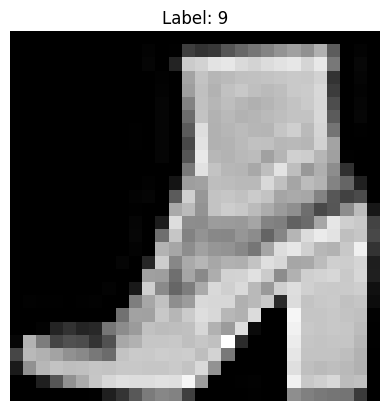

In [55]:
plt.imshow(image, cmap='gray')  # Display the image using grayscale color map
plt.title(f"Label: {np.argmax(label)}")  # Set the title of the plot with the true label
plt.axis('off')  # Remove the axis labels
plt.show()  # Show the plot


These labels are mapped to the following items of clothing

 - 0 T-shirt/top
 - 1 Trouser
 - 2 Pullover
 - 3 Dress
 - 4 Coat
 - 5 Sandal
 - 6 Shirt
 - 7 Sneaker
 - 8 Bag
 - 9 Ankle boot

In [56]:
prediction = model.predict(np.expand_dims(X_test[image_index], axis=0))
predicted_label = np.argmax(prediction)  # Get the predicted label from the prediction


1/1 [==============================] - 0s 55ms/step


In [57]:
print("Prediction:", predicted_label)
print("True Label:", np.argmax(label))


Prediction: 9
True Label: 9


1/1 [==============================] - 0s 54ms/step
Prediction: 9
True Label: 9


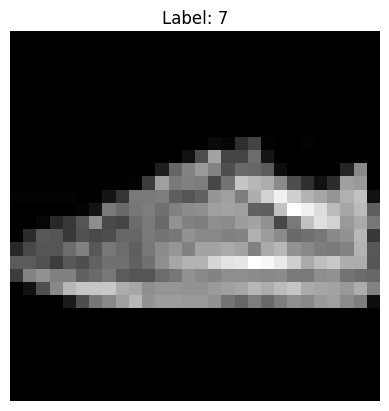

In [63]:
import matplotlib.pyplot as plt
import random

def _test_single(X_test, Y_test):
    image_index = random.randint(0, len(X_test)-1)  # Generate a random index within the range of the test set
    image = X_test[image_index]  # Get the corresponding image data from X_test
    label = Y_test[image_index]  # Get the corresponding label data from y_test

    image = image.reshape(28, 28)  # Reshape the image array from (28, 28, 1) to (28, 28)

    plt.imshow(image, cmap='gray')  # Display the image using grayscale color map
    plt.title(f"Label: {np.argmax(label)}")  # Set the title of the plot with the true label
    plt.axis('off')  # Remove the axis labels

    return plt.gcf()  # Return the current figure for later plotting

prediction = model.predict(np.expand_dims(X_test[image_index], axis=0))
predicted_label = np.argmax(prediction)

print("Prediction:", predicted_label)
print("True Label:", np.argmax(label))

figure = _test_single(X_test, y_test)
plt.show()  # Show the plot


## Session manager

In [ ]:

session_objects = {
    'key': 'value'
}

def session_manager(session_objects):
    for key, value in session_objects.items():
        st.session_state[key] = value
        print((key, value))